In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

import json

from wordcloud import WordCloud

### Load the Dataset

In [2]:
with open("Healthcare.json",'r') as f:
    data=json.load(f)
    
df=pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


<br/>          

Each tags contains several questions(patterns) and answers(response).

In [3]:
dic={"tag":[],"patterns":[],"responses":[]}

for i in range(len(df)):
    ptrns=df[df.index==i]['patterns'].values[0]
    rspns=df[df.index==i]['responses'].values[0]
    tag=df[df.index==i]['tag'].values[0]
    
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df=pd.DataFrame.from_dict(dic)

df


,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


## Exploratory Data Analysis

In [4]:
df_responses=df.explode('responses')
df_responses

,tag,patterns,responses
0,greeting,Hi,Hello there. Tell me how are you feeling today?
0,greeting,Hi,Hi there. What brings you here today?
0,greeting,Hi,Hi there. How are you feeling today?
0,greeting,Hi,Great to see you. How do you feel currently?
0,greeting,Hi,Hello there. Glad to see you're back. What's g...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"If your beliefs , thoughts , feelings or behav..."
228,fact-30,How can I maintain social connections? What if...,"A lot of people are alone right now, but we do..."
229,fact-31,What's the difference between anxiety and stress?,Stress and anxiety are often used interchangea...
230,fact-32,What's the difference between sadness and depr...,"Sadness is a normal reaction to a loss, disapp..."


In [5]:
all_patterns=' '.join(df['patterns'])
all_patterns

"Hi Hey Is anyone there? Hi there Hello Hey there Howdy Hola Bonjour Konnichiwa Guten tag Ola Good morning Good afternoon Good evening Good night Bye See you later Goodbye Au revoir Sayonara ok bye Bye then Fare thee well Thanks Thank you That's helpful Thanks for the help Than you very much  nothing much Who are you? What are you? Who you are? Tell me more about yourself. What is your name? What should I call you? What's your name? Tell me about yourself What can you do? Who created you? How were you made? How were you created? My name is  I am name. I go by  Could you help me? give me a hand please Can you help? What can you do for me? I need support I need help Support me please I am feeling lonely I am so lonely I feel down I feel sad I am sad I feel so lonely I feel empty I don't have anyone I am so stressed out I am so stressed I feel stuck I still feel stressed I am so burned out I feel so worthless. No one likes me. I can't do anything. I am so useless Nothing makes sense anymo

### Patterns Length Distribution

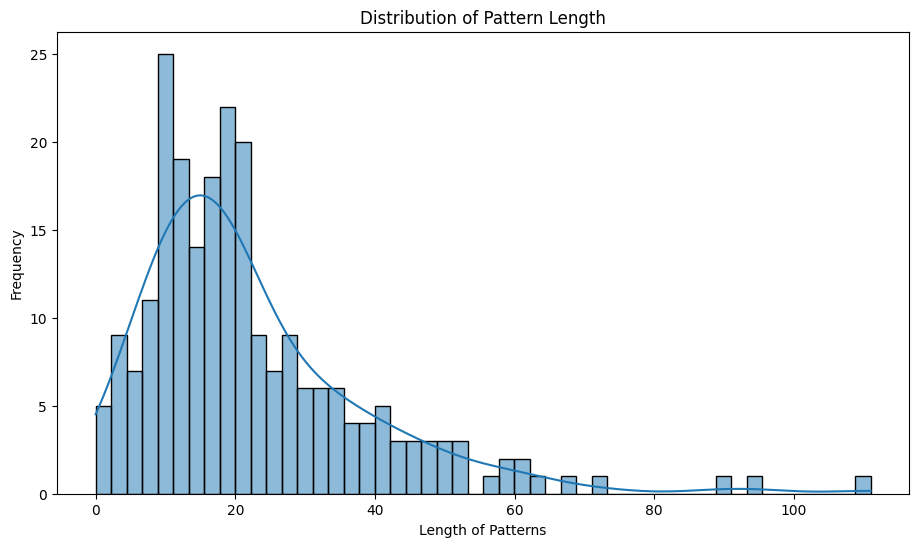

In [6]:
df['pattern_length']=df['patterns'].apply(len)

plt.figure(figsize=(11,6))
sns.histplot(df['pattern_length'],bins=50,kde=True)
plt.title('Distribution of Pattern Length')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

### Distribution of Response Length

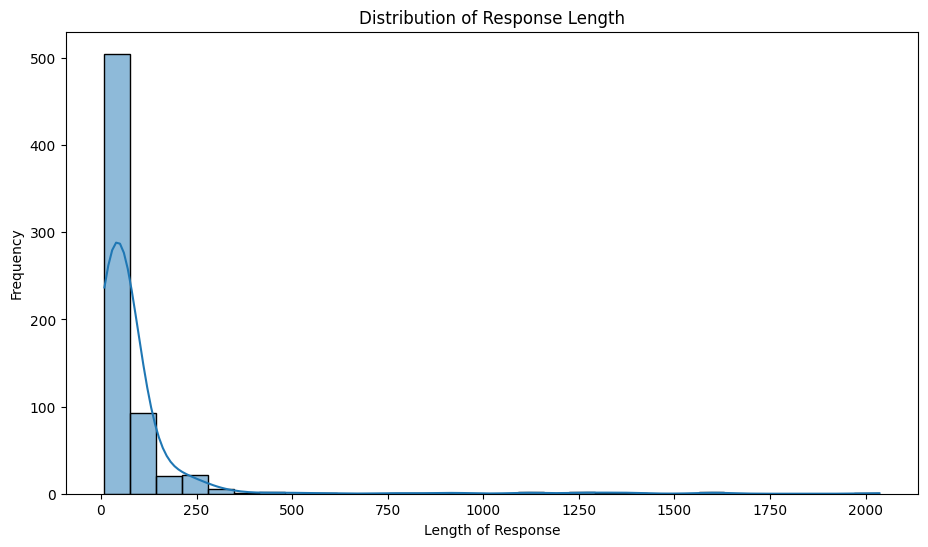

In [7]:
df_responses['response_length']=df_responses['responses'].apply(len)

plt.figure(figsize=(11,6))
sns.histplot(df_responses['response_length'],bins=30,kde=True)
plt.title('Distribution of Response Length')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.show()

### Number of Unique Responses per Intent

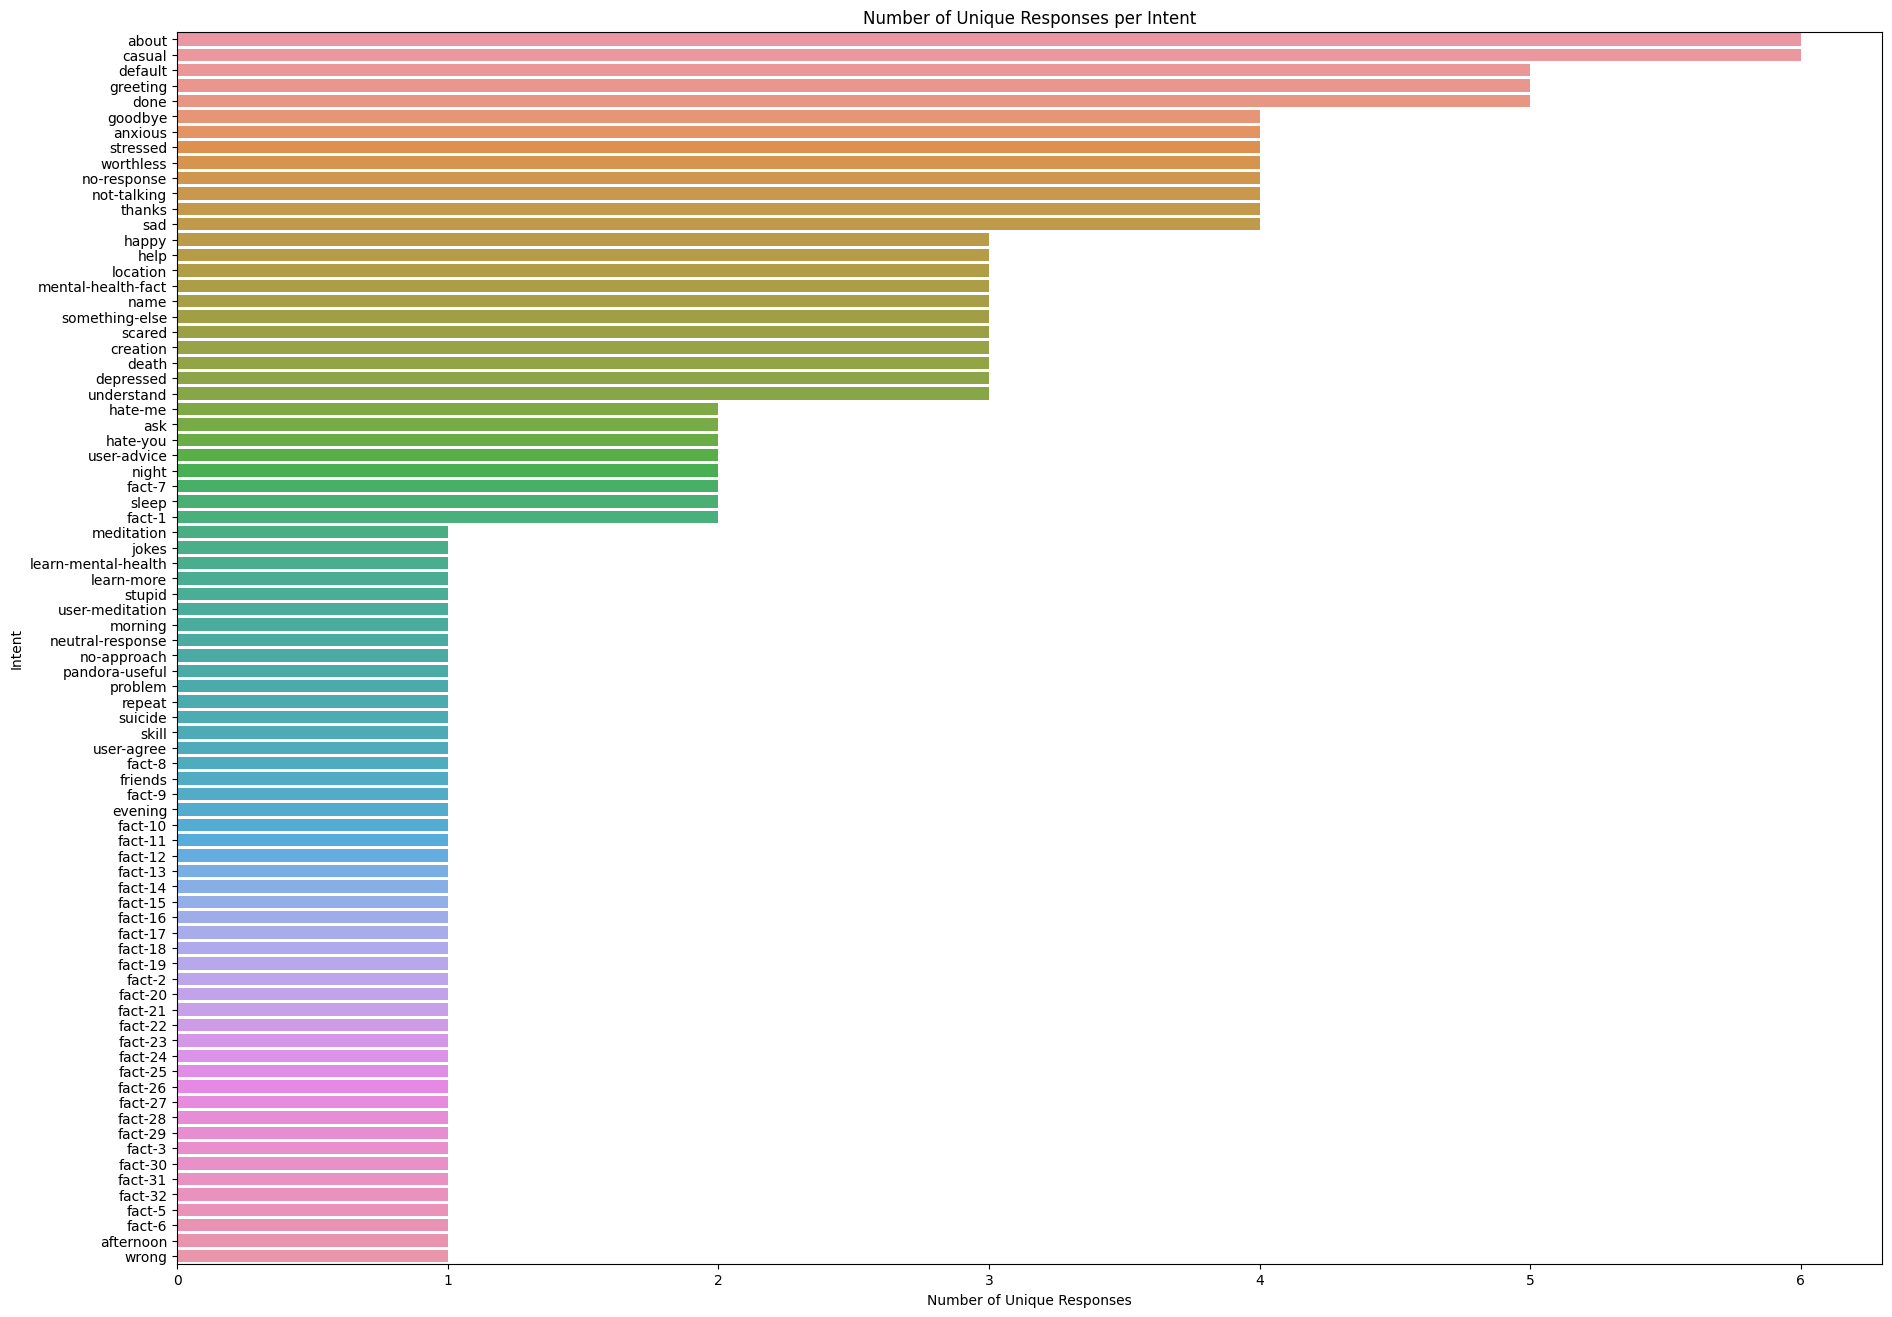

In [8]:
df_unique_responses=df_responses.groupby('tag')['responses'].nunique().reset_index(name='unique_responses_count')

plt.figure(figsize=(22,16))
sns.barplot(x='unique_responses_count',y='tag',data=df_unique_responses.sort_values('unique_responses_count',ascending=False))
plt.title('Number of Unique Responses per Intent')
plt.xlabel('Number of Unique Responses')
plt.ylabel('Number of Unique Responses')
plt.ylabel('Intent')
plt.show()

### Distribution of Intents(Tags)

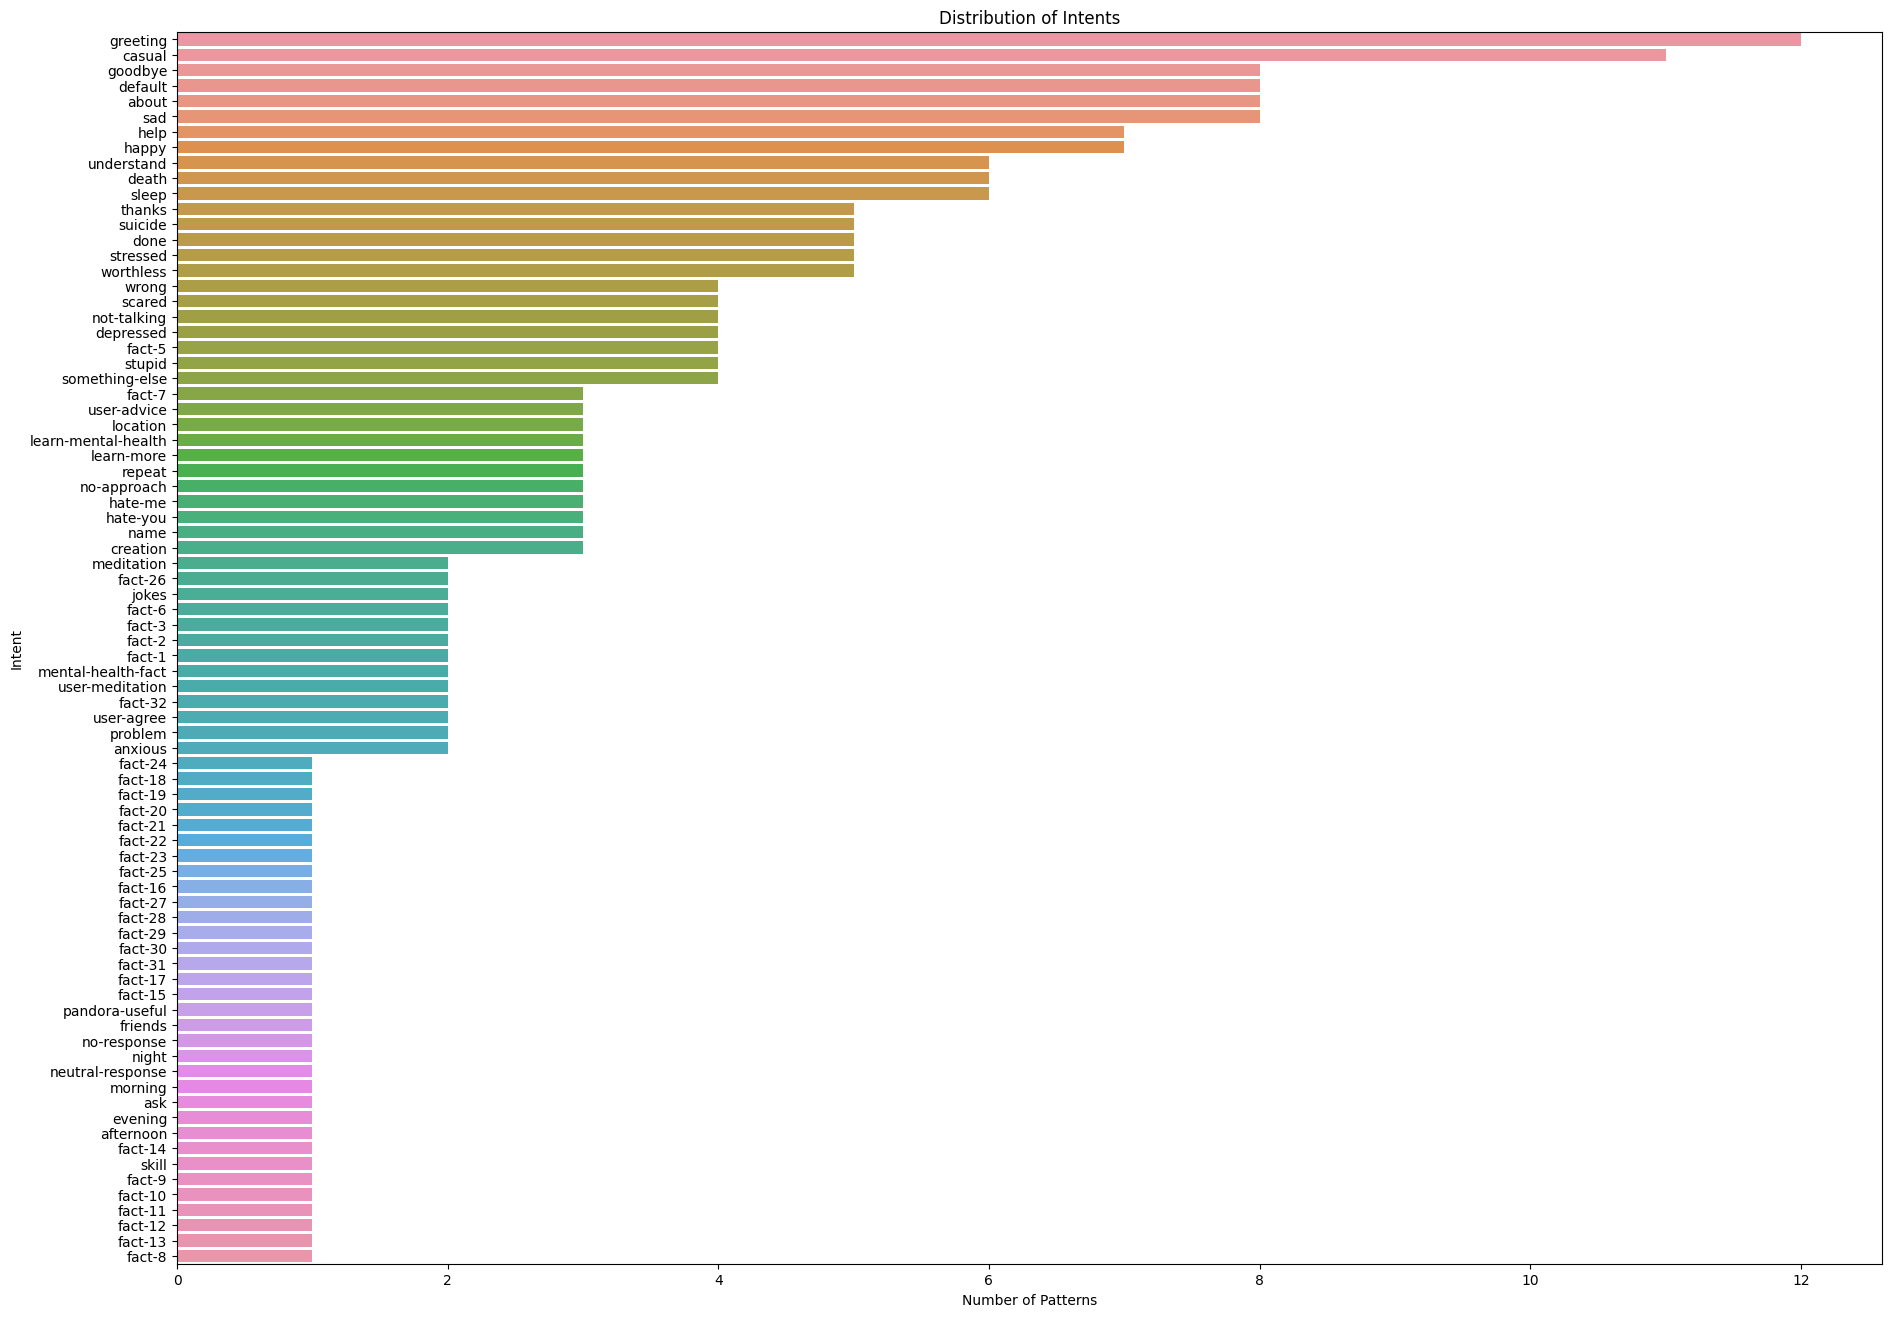

In [9]:
plt.figure(figsize=(22, 16))
sns.countplot(y='tag', data=df, order=df['tag'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()

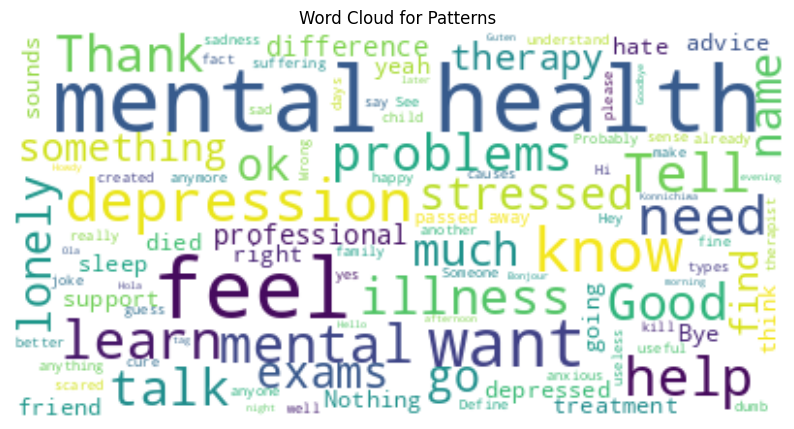

In [10]:
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

<br/>              

# Data Preprocessing       

<br/>

In [11]:
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

In [12]:
df['patterns']=df['patterns'].apply(preprocess_text)
df['tags']=df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length,tags
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2,greeting
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3,greeting
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,16,greeting
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8,greeting
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5,greeting
...,...,...,...,...,...
227,fact-29,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",28,fact
228,fact-30,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",61,fact
229,fact-31,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,49,fact
230,fact-32,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",53,fact


In [13]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

In [14]:
X=df['patterns']
y=df['tag']

<br/>        

# Model Building       

<br/>

In [15]:
import torch

from torch.utils.data import DataLoader, Dataset, random_split

from transformers import BertTokenizer, BertForSequenceClassification, AdamW

from transformers import AutoModelForSequenceClassification, AutoTokenizer

from sklearn.preprocessing import LabelEncoder

C:\Users\prave\anaconda3\envs\tensorflow3.9.5\lib\site-packages\bitsandbytes\cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [16]:
# Tokenization and Encoding the data

tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

max_len=128  #max sequence length

def encode_text(texts,max_len):
    input_ids=[]
    attention_masks=[]
    
    for text in texts:
        encoded_dict=tokenizer.encode_plus(text,add_special_tokens=True,
                                          max_length=max_len,
                                         pad_to_max_length=True,
                                         return_attention_mask=True,
                                         return_tensors='pt')
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
        
    return torch.cat(input_ids,dim=0),torch.cat(attention_masks,dim=0)

In [17]:
# Encoding labels

label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)
num_labels=len(np.unique(y_encoded))


#Encode the patterns
input_ids,attention_masks=encode_text(X,max_len)
labels=torch.tensor(y_encoded)


# Splitting the dataset into training and validation
dataset=torch.utils.data.TensorDataset(input_ids,attention_masks,labels)
train_size=int(0.9*len(dataset))
val_size=len(dataset)-train_size

train_dataset,val_dataset=random_split(dataset,[train_size,val_size])

train_dataloader=DataLoader(train_dataset,shuffle=True,batch_size=16)
validation_dataloader=DataLoader(val_dataset,batch_size=16)


# Model and Optimization
model=BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

optimizer=AdamW(model.parameters(),lr=2e-5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\prave\anaconda3\envs\tensorflow3.9.5\lib\site-packages\transformers\tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the

<br/>           

## Training the Model

<br/>

In [18]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs=10
for epoch in range(epochs):
    model.train()
    total_train_loss=0
    for batch in train_dataloader:
        b_input_ids,b_input_mask,b_labels=tuple(t.to(device) for t in batch)
        model.zero_grad()
        outputs=model(b_input_ids,token_type_ids=None,
                     attention_mask=b_input_mask, 
                     labels=b_labels.long()) # ensure that your labels are of the correct data type (torch.long)
        loss=outputs[0]
        total_train_loss+=loss.item()
        loss.backward()
        optimizer.step()
        avg_train_loss=total_train_loss/len(train_dataloader)
        
    print(f"Epoch {epoch +1}, Average Training Loss: {avg_train_loss:.2f}")
    

Epoch 1, Average Training Loss: 4.38
Epoch 2, Average Training Loss: 4.31
Epoch 3, Average Training Loss: 4.23
Epoch 4, Average Training Loss: 4.11
Epoch 5, Average Training Loss: 3.96
Epoch 6, Average Training Loss: 3.79
Epoch 7, Average Training Loss: 3.63
Epoch 8, Average Training Loss: 3.50
Epoch 9, Average Training Loss: 3.34
Epoch 10, Average Training Loss: 3.19


# Predicting

In [23]:
def predict_intents(text):
    encoded_dict=tokenizer.encode_plus(text,
                                       add_special_tokens=True,
                                      max_length=max_len,
                                      return_attention_mask=True,
                                      return_tensors='pt')
    
    # extract input ids and attention masks from the encoded representation
    input_ids=encoded_dict['input_ids'].to(device)
    attention_mask=encoded_dict['attention_mask'].to(device)
    
    with torch.no_grad():
        outputs=model(input_ids,token_type_ids=None,attention_mask=attention_mask)
        
    logits=outputs[0]
        
    # move logits and labels to cpu
    logits=logits.detach().cpu().numpy()
        
    # use softmax to calculate probabilities
    probabilities=torch.nn.functional.softmax(torch.tensor(logits),dim=1).numpy()
        
    # get the preicted labels with highest probability
    predicted_label_idx=np.argmax(probabilities,axis=1).flatten()
        
    # decode the predicited label
    predicted_label=label_encoder.inverse_transform(predicted_label_idx)[0]
        
    return predicted_label,probabilities[0][predicted_label_idx]

In [24]:
# Example 1

test_message="How do you start a mental health conversation ?"
predicted_intent=predict_intents(test_message)

print(f"Predicted Intent: {predicted_intent}")

Predicted Intent: ('about', array([0.03723657], dtype=float32))


In [28]:
# Example 1

test_message="I feel anxious today"
predicted_intent=predict_intents(test_message)

print(f"Predicted Intent: {predicted_intent}")

Predicted Intent: ('happy', array([0.05407006], dtype=float32))


In [25]:
# Eample 2

test_message="Show your concern for someone who is struggling"
predicted_intent=predict_intents(test_message)

print(f"Predicted Intent: {predicted_intent}")

Predicted Intent: ('hate-me', array([0.02959661], dtype=float32))


# Evaluation

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation Loop
model.eval()
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
y_true, y_pred = [], []

for batch in train_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    
    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    preds = np.argmax(logits, axis=1)
    y_true.extend(label_ids)
    y_pred.extend(preds)
    
    tmp_eval_accuracy = accuracy_score(label_ids, preds)
    eval_accuracy += tmp_eval_accuracy
    
    nb_eval_examples += b_input_ids.size(0)
    nb_eval_steps += 1

eval_accuracy = eval_accuracy / nb_eval_steps
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy: {0:.2f}".format(eval_accuracy))
print("Precision: {0:.2f}".format(precision))
print("Recall: {0:.2f}".format(recall))
print("F1 Score: {0:.2f}".format(f1))


Accuracy: 0.52
Precision: 0.43
Recall: 0.52
F1 Score: 0.42


C:\Users\prave\anaconda3\envs\tensorflow3.9.5\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
